# Task 1- Iris Flower Classification

## Aim

 The aim of this project is to classify iris flower into species:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

 based on the data of their sepals and petals

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Importing required modules for preview of the data

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Importing iris flower data set which is in the form of csv file

In [3]:
dataset = pd.read_csv("Iris.csv")

## Preview of the data

In [4]:
dataset.head()                            # gives first elements in the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()                          # gives the count, column names, and datatypes of features and tagets included in data  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.describe()                      # gives statistical info like count, mean, std deviation, etc 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset["Species"].value_counts()      # gives the count of each species(label/target) in the dataset  

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization Using Seaborn

* Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.
* Here we will be using pairplot from seaborn module to analyze the data.

### Importing seaborn

In [8]:
import seaborn as sns

### Visualizing the data - Pairplot

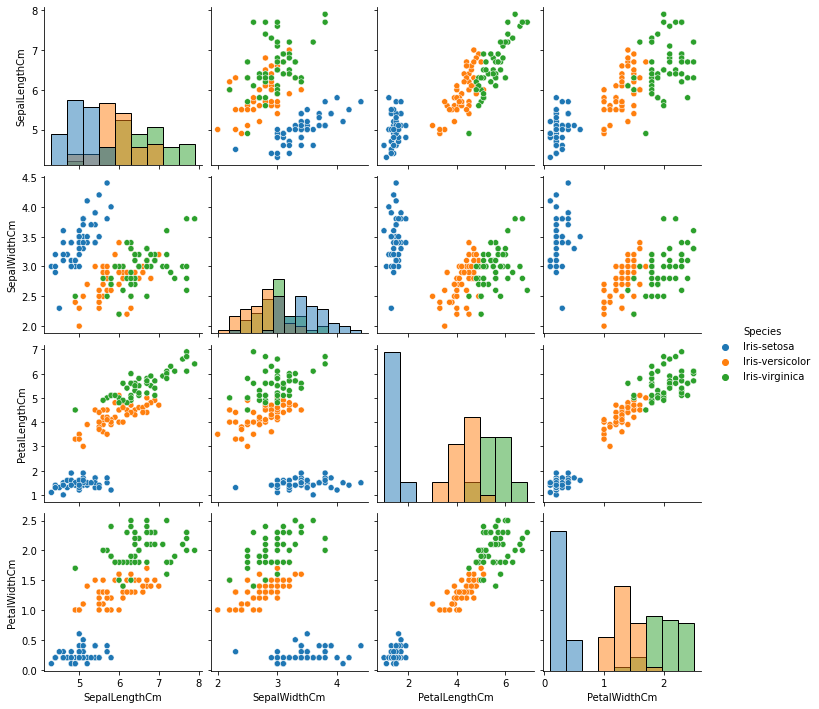

In [9]:
df = dataset.drop(columns="Id")
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.show()

* From this pairplot, we can understand that the pair-wise relationship between features of Iris-setosa is clearly differnt from other two species.
* The pair-wise relationship of other two species, Iris-versicolor(orange) and Iris-virginica(green) shows some overlapping

## Classification using scikit learn

### Training the entire data

In [10]:
X = dataset.drop(columns=['Id','Species'])
y = dataset["Species"]

#### Classification using K-Nearest Neighbors Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
clf = KNeighborsClassifier()
clf.fit(X,y)                            # training the data
y_pred = clf.predict(X)

In [13]:
acc_score = accuracy_score(y_pred,y)
acc_score

0.9666666666666667

Taking 5 nearest neighbours, the accuracy of the machine learning model is 96.7%

Now let's try with all the neighbors between 1-15

In [14]:
accuracy=[]
for k in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y_pred,y)
    print("Accuracy for",k,"neighbors:",acc_score)
    accuracy.append(acc_score)

Accuracy for 1 neighbors: 1.0
Accuracy for 2 neighbors: 0.98
Accuracy for 3 neighbors: 0.96
Accuracy for 4 neighbors: 0.96
Accuracy for 5 neighbors: 0.9666666666666667
Accuracy for 6 neighbors: 0.9733333333333334
Accuracy for 7 neighbors: 0.9733333333333334
Accuracy for 8 neighbors: 0.98
Accuracy for 9 neighbors: 0.98
Accuracy for 10 neighbors: 0.98
Accuracy for 11 neighbors: 0.9733333333333334
Accuracy for 12 neighbors: 0.98
Accuracy for 13 neighbors: 0.98
Accuracy for 14 neighbors: 0.98
Accuracy for 15 neighbors: 0.9866666666666667
Accuracy for 16 neighbors: 0.9866666666666667
Accuracy for 17 neighbors: 0.98
Accuracy for 18 neighbors: 0.9733333333333334
Accuracy for 19 neighbors: 0.98
Accuracy for 20 neighbors: 0.98


In [15]:
max_score = max(accuracy)
print(accuracy.index(max_score))

0


##### As we can see the accuracy rate is 100% for only 1 neighbor and as the neighbors increase the accuracy rate changes.

#### Classification using Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
reg = LogisticRegression()

In [18]:
reg.fit(X,y)                            # training the data
y_pred = reg.predict(X)
acc_score = accuracy_score(y_pred,y)
acc_score

0.9733333333333334

##### The accuracy rate of model using Logistic regression is 97%.

<b> But these models are't useful as we are trainning and testing on the same data. They will be useful only if we train the model on some data and test it on some other.

### Training and Testing on different data using Train_test_split

* Train_test_split module helps us to split the given data into training data and testing data.
* This ensures that we don't use same observations in both sets.
* As the data is already given, it saves us the time to create another dataset for testing.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(len(X_train),',',len(X_test),',',len(y_train),',',len(y_test))

105 , 45 , 105 , 45


#### Classification using K-Nearest Neighbors Classifier

Here, let's directly try accuracy for 1-30 neighbors

In [21]:
rng=list(range(1,31))
accuracy=[]
for k in rng:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_pred,y_test)
    accuracy.append(acc_score)

Let's plot a graph of accuracy scores

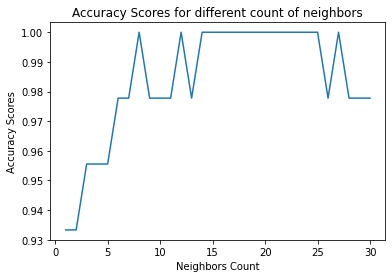

In [22]:
plt.plot(rng,accuracy)
plt.xlabel("Neighbors Count")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores for different count of neighbors")
plt.show()

##### As we can see, the accuracy thee model is 100% between 15-25 neighbors. Thus for this model, we can take any number of neighbor from 15-25 to predict accurate result

#### Classification using Logistic Regression

In [23]:
reg.fit(X_train,y_train)                            # training the data
y_pred = reg.predict(X_test)
acc_score = accuracy_score(y_pred,y_test)
acc_score

0.9777777777777777

##### The accuracy rate of model using Logistic regression is  approximately 98%.

### Thus, we can predict the species of iris flower for given sepal length and width and petal length and width using machine learning model

# THANK YOU